<a href="https://colab.research.google.com/github/jurikal/proyectoviolenciaintrafamiliar/blob/main/Analisis_Dataset_Violencia_Intrafamiliar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Casos de Violencia Intrafamiliar en Colombia**

**Hecho por:** July Alarcon

**Objetivos:**

1. Realizar una buena limpieza de datos

2. Determinar en qué departamentos y municipios de Colombia se reportan más casos de violencia intrafamiliar.

3. Examinar cómo varía la cantidad de casos de violencia intrafamiliar a lo largo del tiempo.

4. Comparar la incidencia de casos entre zonas rurales y urbanas.

5. Identificar posibles picos o periodos de alta incidencia de violencia intrafamiliar en fechas específicas.


In [1]:
#Importo las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargo el archivo desde GitHub
url = 'https://raw.githubusercontent.com/jurikal/proyectoviolenciaintrafamiliar/main/VIOLENCIA_INTRAFAMILIAR_20240807.csv'
data = pd.read_csv(url, encoding='utf-8')

In [3]:
# Vista de las primeras 20 filas del DataFrame
data.head(20)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ZONA,CANTIDAD
0,30/06/2024,5,ANDES,5034,ANTIOQUIA,URBANA,2
1,30/06/2024,5,APARTADO,5045,ANTIOQUIA,URBANA,1
2,30/06/2024,5,APARTADO,5045,ANTIOQUIA,URBANA,1
3,30/06/2024,5,BELLO,5088,ANTIOQUIA,URBANA,3
4,30/06/2024,5,CAREPA,5147,ANTIOQUIA,URBANA,1
5,30/06/2024,5,COPACABANA,5212,ANTIOQUIA,URBANA,2
6,30/06/2024,5,COPACABANA,5212,ANTIOQUIA,URBANA,1
7,30/06/2024,5,EL CARMEN DE VIBORAL,5148,ANTIOQUIA,URBANA,1
8,30/06/2024,5,GIRARDOTA,5308,ANTIOQUIA,URBANA,2
9,30/06/2024,5,ITAGUI,5360,ANTIOQUIA,URBANA,1


In [4]:
# Vista de las ultimas 20 filas del DataFrame
data.tail(20)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ZONA,CANTIDAD
566256,01/01/2003,8,ATLANTICO,8001,BARRANQUILLA,URBANA,1
566257,01/01/2003,17,CALDAS,17001,MANIZALES,URBANA,2
566258,01/01/2003,19,CAUCA,19001,POPAYAN,URBANA,1
566259,01/01/2003,25,CUNDINAMARCA,25843,VILLA DE SAN DIEGO DE UBATE,URBANA,1
566260,01/01/2003,11,BOGOTA,11001,BOGOTA,URBANA,7
566261,01/01/2003,25,CUNDINAMARCA,25260,EL ROSAL,URBANA,1
566262,01/01/2003,11,BOGOTA,11001,BOGOTA,URBANA,1
566263,01/01/2003,25,CUNDINAMARCA,25899,ZIPAQUIRA,URBANA,1
566264,01/01/2003,41,HUILA,41551,PITALITO,URBANA,1
566265,01/01/2003,41,HUILA,41551,PITALITO,URBANA,1


Como podemos evidenciar, este conjunto de datos tiene desorden, donde el valor de la columna departamento está en la columna municipio y viceversa. Para solucionar este error hay que hacer una limpieza de datos.



Con esta instrucción verifico el nombre de las columnas del conjunto de datos

In [5]:
# Instrucción para verificar el nombre de las columnas del Dataframe
print(data.columns)

Index(['FECHA HECHO', 'COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO',
       'ZONA', 'CANTIDAD'],
      dtype='object')


Luego, reviso los valores únicos que se encuentran en la columna DEPARTAMENTO para saber si los valores corresponden a los nombres de los departamentos de Colombia:

In [6]:
# Instrucción para ver los valores únicos en la columna DEPARTAMENTO
pd.unique(data['DEPARTAMENTO'])

array(['ANDES', 'APARTADO', 'BELLO', 'CAREPA', 'COPACABANA',
       'EL CARMEN DE VIBORAL', 'GIRARDOTA', 'ITAGUI', 'LA ESTRELLA',
       'MEDELLIN', 'SABANETA', 'SAN JUAN DE URABA', 'SANTA ROSA DE OSOS',
       'TARAZA', 'TAME', 'BARRANQUILLA', 'REPELON', 'SANTO TOMAS',
       'SOLEDAD', 'BOGOTA', 'ARENAL', 'CARTAGENA DE INDIAS', 'TURBACO',
       'CHIQUINQUIRA', 'COVARACHIA', 'DUITAMA', 'PUERTO BOYACA',
       'RAQUIRA', 'VILLA DE LEYVA', 'FLORENCIA', 'YOPAL', 'POPAYAN',
       'PUERTO TEJADA', 'SUAREZ', 'VILLA RICA', 'AGUACHICA',
       'PUEBLO BELLO', 'VALLEDUPAR', 'QUIBDO', 'CIENAGA DE ORO', 'LORICA',
       'MONTELIBANO', 'MONTERIA', 'SAHAGUN', 'SAN ANTERO', 'CHIA',
       'GACHANCIPA', 'LA VEGA', 'MADRID', 'MOSQUERA', 'SIBATE',
       'SILVANIA', 'SOACHA', 'TOCAIMA', 'UNE', 'INIRIDA', 'EL RETORNO',
       'HOBO', 'LA PLATA', 'NEIVA', 'PITALITO', 'GRANADA', 'GUAMAL',
       'PUERTO GAITAN', 'VILLAVICENCIO', 'CONSACA', 'IPIALES', 'PASTO',
       'SAN ANDRES DE TUMACO', 'YACUANQUER'

Con esto podemos ver que en la columna DEPARTAMENTOS encontramos nombres de municipios de Colombia.

Voy a revisar los valores que se encuentran en la columna MUNICIPIO:

In [7]:
# Instrucción para ver los valores únicos en la columna MUNICIPIO
pd.unique(data['MUNICIPIO'])

array(['ANTIOQUIA', 'ARAUCA', 'ATLANTICO', ..., 'MEDIO BAUDO', 'REMOLINO',
       'CARMEN DEL DARIEN'], dtype=object)

Es evidente que hay un error en este conjunto de datos con respecto a los valores de las columnas de DEPARTAMENTO y MUNICIPIO. Los valores de esas columnas estan cruzados.

Como este es un conjunto de datos bastante amplio es difícil hacer el proceso de corregir los valores de las columnas DEPARTAMENTO y MUNICIPIO de manera manual, por esta razón voy a realizar el paso a paso para solucionar este problema.

Comienzo creando una lista que contenga todos los departamentos de Colombia:

In [8]:
departamentos_validos = [
    'AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA',
    'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARINO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
    'SAN ANDRES ISLAS', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VICHADA']




Ahora voy a identificar las filas en donde los valores estan cruzados, es decir, en donde el MUNICIPIO es en realidad un DEPARTAMENTO:

In [9]:
# Instrucción para identificar filas problematicas
filas_problema = data[data['MUNICIPIO'].isin(departamentos_validos)]


En esas filas problematicas que acabo de encontrar voy a intercambiar los valores de las columnas DEPARTAMENTO y MUNICIPIO:

In [10]:
# Instrucción para intercambiar los valores de las columnas DEPARTAMENTO y MUNICIPIO en las filas problemáticas
data.loc[data['MUNICIPIO'].isin(departamentos_validos), ['DEPARTAMENTO', 'MUNICIPIO']] = \
data.loc[data['MUNICIPIO'].isin(departamentos_validos), ['MUNICIPIO', 'DEPARTAMENTO']].values


Ahora, verifico que la corrección que hice de las filas problematicas en las columnas DEPARTAMENTO y MUNICIPIO hayan quedado bien hechas:

In [11]:
# Instrucción para ver los primeros registros del Dataframe para asegurar que la corrección se ha hecho correctamente
print(data.head(20))

   FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI             MUNICIPIO  \
0   30/06/2024          5    ANTIOQUIA      5034                 ANDES   
1   30/06/2024          5    ANTIOQUIA      5045              APARTADO   
2   30/06/2024          5    ANTIOQUIA      5045              APARTADO   
3   30/06/2024          5    ANTIOQUIA      5088                 BELLO   
4   30/06/2024          5    ANTIOQUIA      5147                CAREPA   
5   30/06/2024          5    ANTIOQUIA      5212            COPACABANA   
6   30/06/2024          5    ANTIOQUIA      5212            COPACABANA   
7   30/06/2024          5    ANTIOQUIA      5148  EL CARMEN DE VIBORAL   
8   30/06/2024          5    ANTIOQUIA      5308             GIRARDOTA   
9   30/06/2024          5    ANTIOQUIA      5360                ITAGUI   
10  30/06/2024          5    ANTIOQUIA      5360                ITAGUI   
11  30/06/2024          5    ANTIOQUIA      5380           LA ESTRELLA   
12  30/06/2024          5    ANTIOQUIA

También verifico que las ultimas filas hayan quedado con la corrección que hice de las filas problematicas en las columnas DEPARTAMENTO y MUNICIPIO:

In [12]:
# Instrucción para ver los ultimos registros del Dataframe para asegurar que la corrección se ha hecho correctamente
print(data.tail(20))

       FECHA HECHO  COD_DEPTO        DEPARTAMENTO  COD_MUNI  \
566256  01/01/2003          8           ATLANTICO      8001   
566257  01/01/2003         17              CALDAS     17001   
566258  01/01/2003         19               CAUCA     19001   
566259  01/01/2003         25        CUNDINAMARCA     25843   
566260  01/01/2003         11              BOGOTA     11001   
566261  01/01/2003         25        CUNDINAMARCA     25260   
566262  01/01/2003         11              BOGOTA     11001   
566263  01/01/2003         25        CUNDINAMARCA     25899   
566264  01/01/2003         41               HUILA     41551   
566265  01/01/2003         41               HUILA     41551   
566266  01/01/2003         41               HUILA     41132   
566267  01/01/2003         41               HUILA     41530   
566268  01/01/2003         50                META     50001   
566269  01/01/2003         52              NARINO     52001   
566270  01/01/2003         54  NORTE DE SANTANDER     5


Reviso la mitad de los datos aleatoriamente para ver que los cambios hechos en las columnas DEPARTAMENTO y MUNICIPIO esten correctamente:

In [13]:
# Instrucción para ver una muestra aleatoria de la mitad de los datos
muestra = data.sample(frac=0.5, random_state=1)
print("Muestra Aleatoria del 50% del DataFrame:")
print(muestra)


Muestra Aleatoria del 50% del DataFrame:
       FECHA HECHO  COD_DEPTO     DEPARTAMENTO  COD_MUNI   MUNICIPIO    ZONA  \
422524  17/10/2013         11           BOGOTA     11001      BOGOTA  URBANA   
478099  16/08/2010         11           BOGOTA     11001      BOGOTA  URBANA   
133111  30/07/2021         76  VALLE DEL CAUCA     76130  CANDELARIA  URBANA   
41133   04/09/2023         25     CUNDINAMARCA     25286       FUNZA  URBANA   
158953  18/01/2021         17           CALDAS     17380   LA DORADA  URBANA   
...            ...        ...              ...       ...         ...     ...   
194474  17/03/2020         11           BOGOTA     11001      BOGOTA  URBANA   
186106  05/06/2020          5        ANTIOQUIA      5360      ITAGUI  URBANA   
338676  09/07/2016         70            SUCRE     70001   SINCELEJO  URBANA   
234746  18/04/2019         11           BOGOTA     11001      BOGOTA  URBANA   
510821  19/04/2008         76  VALLE DEL CAUCA     76834       TULUA  URBANA   

Aunque todo parezca estar bien, debo corroborar, para eso voy a realizar un nuevo proceso de limpieza de la columna DEPARTAMENTO para no tener errores y sorpresas desagradables más adelante:

In [14]:
# Instrucción para filtrar los departamentos que parecen ser municipios
municipios_posibles = data[data['DEPARTAMENTO'].isin(departamentos_validos)]

print(municipios_posibles[['FECHA HECHO', 'DEPARTAMENTO', 'MUNICIPIO']])

       FECHA HECHO        DEPARTAMENTO            MUNICIPIO
0       30/06/2024           ANTIOQUIA                ANDES
1       30/06/2024           ANTIOQUIA             APARTADO
2       30/06/2024           ANTIOQUIA             APARTADO
3       30/06/2024           ANTIOQUIA                BELLO
4       30/06/2024           ANTIOQUIA               CAREPA
...            ...                 ...                  ...
566271  01/01/2003  NORTE DE SANTANDER               CUCUTA
566272  01/01/2003           RISARALDA  SANTA ROSA DE CABAL
566273  01/01/2003           SANTANDER          BUCARAMANGA
566274  01/01/2003           SANTANDER                VELEZ
566275  01/01/2003              TOLIMA               IBAGUE

[566276 rows x 3 columns]


In [15]:
# Instrucción para ingresar a la lista los departamentos validos
departamentos_validos = [
    'AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA',
    'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARINO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
    'SAN ANDRES ISLAS', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VICHADA']

# Instrucción para filtrar los valores que estan en la columna DEPARTAMENTOS pero no en la lista de departamentos validos, es decir los intrusos
posibles_errores = data[~data['DEPARTAMENTO'].isin(departamentos_validos)]

# Instrucción para ver los intrusos
print(posibles_errores[['FECHA HECHO', 'DEPARTAMENTO', 'MUNICIPIO']])

Empty DataFrame
Columns: [FECHA HECHO, DEPARTAMENTO, MUNICIPIO]
Index: []


Hago este proceso de verificación manual porque me encontré a estos municipios en la columna departamentos, incluso después de toda la limpieza realizada. Por esta razón debo realizar una nueva limpieza:

In [16]:
# Instrucción para indicar los municipios que aun se encuentran en la columna DEPARTAMENTOS, es decir los intrusos
municipios_incorrectos = [
    'IPIALES', 'SAN ANDRES DE TUMACO', 'SAN PEDRO DE CARTAGO','LA UNION','EL TAMBO','EL ROSARIO','TUQUERRES','EL CHARCO'
]

In [17]:
# Instrucción para filtrar las filas donde el DEPARTAMENTO es un municipio incorrecto, los intrusos
filas_incorrectas = data[data['DEPARTAMENTO'].isin(municipios_incorrectos)]

# Instrucción para intercambiar los valores de DEPARTAMENTO y MUNICIPIO en las filas que encuentre los intrusos
for idx, row in filas_incorrectas.iterrows():
    # Instrucción solamente para intercambiar si el municipio intruso está en DEPARTAMENTO y un departamento válido está en MUNICIPIO
    if row['MUNICIPIO'] not in municipios_incorrectos:
        data.at[idx, 'DEPARTAMENTO'], data.at[idx, 'MUNICIPIO'] = row['MUNICIPIO'], row['DEPARTAMENTO']

In [18]:
# Instrucción para verificar si aún después de todo este proceso aun quedan municipios intrusos en la columna DEPARTAMENTO
municipios_restantes = data[data['DEPARTAMENTO'].isin(municipios_incorrectos)]
print(municipios_restantes[['DEPARTAMENTO', 'MUNICIPIO']])
print(data)

Empty DataFrame
Columns: [DEPARTAMENTO, MUNICIPIO]
Index: []
       FECHA HECHO  COD_DEPTO        DEPARTAMENTO  COD_MUNI  \
0       30/06/2024          5           ANTIOQUIA      5034   
1       30/06/2024          5           ANTIOQUIA      5045   
2       30/06/2024          5           ANTIOQUIA      5045   
3       30/06/2024          5           ANTIOQUIA      5088   
4       30/06/2024          5           ANTIOQUIA      5147   
...            ...        ...                 ...       ...   
566271  01/01/2003         54  NORTE DE SANTANDER     54001   
566272  01/01/2003         66           RISARALDA     66682   
566273  01/01/2003         68           SANTANDER     68001   
566274  01/01/2003         68           SANTANDER     68861   
566275  01/01/2003         73              TOLIMA     73001   

                  MUNICIPIO    ZONA  CANTIDAD  
0                     ANDES  URBANA         2  
1                  APARTADO  URBANA         1  
2                  APARTADO  URBANA   

In [19]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'TUQUERRES'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI  MUNICIPIO    ZONA  \
1521    17/06/2024         52       NARINO     52838  TUQUERRES  URBANA   
1674    16/06/2024         52       NARINO     52838  TUQUERRES  URBANA   
2677    08/06/2024         52       NARINO     52838  TUQUERRES  URBANA   
3187    04/06/2024         52       NARINO     52838  TUQUERRES  URBANA   
4136    28/05/2024         52       NARINO     52838  TUQUERRES  URBANA   
...            ...        ...          ...       ...        ...     ...   
552145  29/11/2004         52       NARINO     52838  TUQUERRES  URBANA   
552968  19/10/2004         52       NARINO     52838  TUQUERRES  URBANA   
554603  06/08/2004         52       NARINO     52838  TUQUERRES  URBANA   
555011  18/07/2004         52       NARINO     52838  TUQUERRES  URBANA   
562977  25/06/2003         52       NARINO     52838  TUQUERRES  URBANA   

        CANTIDAD  
1521           1  
1674           1  
2677           1  
3187           1  
4136

In [20]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'TUQUERRES'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [21]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'EL TAMBO'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
1257    19/06/2024         52       NARINO     52260  EL TAMBO  URBANA   
2258    11/06/2024         52       NARINO     52260  EL TAMBO  URBANA   
2638    08/06/2024         19        CAUCA     19256  EL TAMBO  URBANA   
3460    02/06/2024         19        CAUCA     19256  EL TAMBO  URBANA   
4387    26/05/2024         19        CAUCA     19256  EL TAMBO  URBANA   
...            ...        ...          ...       ...       ...     ...   
528974  11/12/2006         19        CAUCA     19256  EL TAMBO  URBANA   
531470  09/10/2006         19        CAUCA     19256  EL TAMBO  URBANA   
538350  17/04/2006         19        CAUCA     19256  EL TAMBO  URBANA   
540838  06/02/2006         19        CAUCA     19256  EL TAMBO   RURAL   
547797  07/06/2005         19        CAUCA     19256  EL TAMBO  URBANA   

        CANTIDAD  
1257           1  
2258           1  
2638           1  
3460           1  
4387           1

In [22]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'EL TAMBO'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [23]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'IPIALES'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
81      30/06/2024         52       NARINO     52356   IPIALES  URBANA   
177     29/06/2024         52       NARINO     52356   IPIALES  URBANA   
278     28/06/2024         52       NARINO     52356   IPIALES  URBANA   
369     27/06/2024         52       NARINO     52356   IPIALES  URBANA   
690     24/06/2024         52       NARINO     52356   IPIALES  URBANA   
...            ...        ...          ...       ...       ...     ...   
560213  14/11/2003         52       NARINO     52356   IPIALES  URBANA   
560958  08/10/2003         52       NARINO     52356   IPIALES  URBANA   
561302  22/09/2003         52       NARINO     52356   IPIALES  URBANA   
562277  03/08/2003         52       NARINO     52356   IPIALES  URBANA   
562588  16/07/2003         52       NARINO     52356   IPIALES  URBANA   

        CANTIDAD  
81             2  
177            1  
278            1  
369            1  
690            2

In [24]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'IPIALES'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [25]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'SAN ANDRES DE TUMACO'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI             MUNICIPIO  \
83      30/06/2024         52       NARINO     52835  SAN ANDRES DE TUMACO   
1038    21/06/2024         52       NARINO     52835  SAN ANDRES DE TUMACO   
1147    20/06/2024         52       NARINO     52835  SAN ANDRES DE TUMACO   
1261    19/06/2024         52       NARINO     52835  SAN ANDRES DE TUMACO   
1520    17/06/2024         52       NARINO     52835  SAN ANDRES DE TUMACO   
...            ...        ...          ...       ...                   ...   
553811  12/09/2004         52       NARINO     52835  SAN ANDRES DE TUMACO   
554626  05/08/2004         52       NARINO     52835  SAN ANDRES DE TUMACO   
555102  13/07/2004         52       NARINO     52835  SAN ANDRES DE TUMACO   
557406  31/03/2004         52       NARINO     52835  SAN ANDRES DE TUMACO   
563672  19/05/2003         52       NARINO     52835  SAN ANDRES DE TUMACO   

          ZONA  CANTIDAD  
83      URBANA         1  
1038    U

In [26]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'SAN ANDRES DE TUMACO'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [27]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'SAN PEDRO DE CARTAGO'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI             MUNICIPIO  \
17104   28/02/2024         52       NARINO     52694  SAN PEDRO DE CARTAGO   
17105   28/02/2024         52       NARINO     52694  SAN PEDRO DE CARTAGO   
18300   20/02/2024         52       NARINO     52694  SAN PEDRO DE CARTAGO   
18301   20/02/2024         52       NARINO     52694  SAN PEDRO DE CARTAGO   
18639   18/02/2024         52       NARINO     52694  SAN PEDRO DE CARTAGO   
...            ...        ...          ...       ...                   ...   
535598  03/07/2006         52       NARINO     52694  SAN PEDRO DE CARTAGO   
536436  12/06/2006         52       NARINO     52694  SAN PEDRO DE CARTAGO   
536486  11/06/2006         52       NARINO     52694  SAN PEDRO DE CARTAGO   
545472  02/09/2005         52       NARINO     52694  SAN PEDRO DE CARTAGO   
549984  12/03/2005         52       NARINO     52694  SAN PEDRO DE CARTAGO   

          ZONA  CANTIDAD  
17104   URBANA         1  
17105   U

In [28]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'SAN PEDRO DE CARTAGO'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [29]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'LA UNION'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
940     22/06/2024         70        SUCRE     70400  LA UNION  URBANA   
1784    15/06/2024         52       NARINO     52399  LA UNION  URBANA   
2537    09/06/2024         52       NARINO     52399  LA UNION  URBANA   
2674    08/06/2024         52       NARINO     52399  LA UNION  URBANA   
3185    04/06/2024         52       NARINO     52399  LA UNION  URBANA   
...            ...        ...          ...       ...       ...     ...   
565030  10/03/2003          5    ANTIOQUIA      5400  LA UNION  URBANA   
565317  24/02/2003          5    ANTIOQUIA      5400  LA UNION  URBANA   
565439  17/02/2003          5    ANTIOQUIA      5400  LA UNION  URBANA   
565732  02/02/2003          5    ANTIOQUIA      5400  LA UNION  URBANA   
566015  16/01/2003          5    ANTIOQUIA      5400  LA UNION  URBANA   

        CANTIDAD  
940            1  
1784           1  
2537           1  
2674           1  
3185           1

In [30]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'LA UNION'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [31]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'EL ROSARIO'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI   MUNICIPIO    ZONA  \
4440    26/05/2024         52       NARINO     52256  EL ROSARIO  URBANA   
4441    26/05/2024         52       NARINO     52256  EL ROSARIO  URBANA   
21615   29/01/2024         52       NARINO     52256  EL ROSARIO  URBANA   
58135   19/04/2023         52       NARINO     52256  EL ROSARIO   RURAL   
61661   19/03/2023         52       NARINO     52256  EL ROSARIO  URBANA   
...            ...        ...          ...       ...         ...     ...   
510208  06/05/2008         52       NARINO     52256  EL ROSARIO  URBANA   
530059  13/11/2006         52       NARINO     52256  EL ROSARIO   RURAL   
554691  02/08/2004         52       NARINO     52256  EL ROSARIO  URBANA   
563525  26/05/2003         52       NARINO     52256  EL ROSARIO  URBANA   
563526  26/05/2003         52       NARINO     52256  EL ROSARIO  URBANA   

        CANTIDAD  
4440           1  
4441           2  
21615          1  
58135      

In [32]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'EL ROSARIO'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [33]:
# Instrucción para filtrar el municipio, esto con el fin de ver si aparece en la columna MUNICIPIO, este era un intruso
municipio_buscar = 'EL CHARCO'

resultado_municipio = data[data['MUNICIPIO'] == municipio_buscar]
print(resultado_municipio)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI  MUNICIPIO    ZONA  \
1782    15/06/2024         52       NARINO     52250  EL CHARCO  URBANA   
2535    09/06/2024         52       NARINO     52250  EL CHARCO  URBANA   
6443    12/05/2024         52       NARINO     52250  EL CHARCO  URBANA   
6444    12/05/2024         52       NARINO     52250  EL CHARCO  URBANA   
12223   01/04/2024         52       NARINO     52250  EL CHARCO  URBANA   
...            ...        ...          ...       ...        ...     ...   
529490  27/11/2006         52       NARINO     52250  EL CHARCO  URBANA   
541119  30/01/2006         52       NARINO     52250  EL CHARCO  URBANA   
544982  19/09/2005         52       NARINO     52250  EL CHARCO  URBANA   
547859  05/06/2005         52       NARINO     52250  EL CHARCO  URBANA   
558234  23/02/2004         52       NARINO     52250  EL CHARCO  URBANA   

        CANTIDAD  
1782           1  
2535           1  
6443           2  
6444           1  
1222

In [34]:
# Instrucción para filtrar en la columna DEPARTAMENTO el municipio que era un intruso, esto con el fin de ver si aun aparece en la columna DEPARTAMENTO
departamento_buscar = 'EL CHARCO'

resultado_departamento = data[data['DEPARTAMENTO'] == departamento_buscar]
print(resultado_departamento)

Empty DataFrame
Columns: [FECHA HECHO, COD_DEPTO, DEPARTAMENTO, COD_MUNI, MUNICIPIO, ZONA, CANTIDAD]
Index: []


In [35]:
# Instrucción para ver todos los valores únicos en la columna DEPARTAMENTO
valores_unicos = data['DEPARTAMENTO'].unique()
print(valores_unicos)


['ANTIOQUIA' 'ARAUCA' 'ATLANTICO' 'BOGOTA' 'BOLIVAR' 'BOYACA' 'CAQUETA'
 'CASANARE' 'CAUCA' 'CESAR' 'CHOCO' 'CORDOBA' 'CUNDINAMARCA' 'GUAINIA'
 'GUAVIARE' 'HUILA' 'META' 'NARINO' 'NORTE DE SANTANDER' 'PUTUMAYO'
 'QUINDIO' 'RISARALDA' 'SAN ANDRES ISLAS' 'SANTANDER' 'SUCRE' 'TOLIMA'
 'VALLE DEL CAUCA' 'VICHADA' 'CALDAS' 'MAGDALENA' 'AMAZONAS' 'LA GUAJIRA'
 'VAUPES']


In [36]:
# Instrucción para ver todos los valores en la columna DEPARTAMENTO
print(data['DEPARTAMENTO'])

0                  ANTIOQUIA
1                  ANTIOQUIA
2                  ANTIOQUIA
3                  ANTIOQUIA
4                  ANTIOQUIA
                 ...        
566271    NORTE DE SANTANDER
566272             RISARALDA
566273             SANTANDER
566274             SANTANDER
566275                TOLIMA
Name: DEPARTAMENTO, Length: 566276, dtype: object


In [37]:
# Instrucción para ver todos los valores únicos en DEPARTAMENTO con sus frecuencias
frecuencia_valores = data['DEPARTAMENTO'].value_counts()
print(frecuencia_valores)


DEPARTAMENTO
ANTIOQUIA             63927
VALLE DEL CAUCA       54079
CUNDINAMARCA          51931
SANTANDER             44282
BOYACA                38563
TOLIMA                22811
HUILA                 22691
ATLANTICO             20725
BOLIVAR               20670
NARINO                19703
META                  19684
RISARALDA             18760
CAUCA                 17509
NORTE DE SANTANDER    17023
CALDAS                16016
CORDOBA               15261
BOGOTA                14845
SUCRE                 12657
MAGDALENA             12086
CESAR                 11628
CASANARE              10154
QUINDIO                7647
CAQUETA                6854
LA GUAJIRA             6177
PUTUMAYO               5054
ARAUCA                 4859
CHOCO                  2895
AMAZONAS               2126
GUAVIARE               1786
SAN ANDRES ISLAS       1660
GUAINIA                 873
VICHADA                 700
VAUPES                  640
Name: count, dtype: int64


Después de realizar un largo proceso puedo decir que las columnas de DEPARTAMENTO y MUNICIPIO de este conjunto de datos han quedado corregidas.







Reviso que no hayan comillas en las columnas de DEPARTAMENTO, MUNICIPIO Y ZONA:

In [38]:
# Instrucción para verificar que no hayan comillas en columnas: DEPARTAMENTO, MUNICIPIO, ZONA
registros_con_comillas_dobles = 0
registros_con_comillas_simples = 0

registros_con_comillas_dobles += data['DEPARTAMENTO'].str.contains('"').sum()
registros_con_comillas_simples += data['DEPARTAMENTO'].str.contains("'").sum()
registros_con_comillas_dobles += data['MUNICIPIO'].str.contains('"').sum()
registros_con_comillas_simples += data['MUNICIPIO'].str.contains("'").sum()
registros_con_comillas_dobles += data['ZONA'].str.contains('"').sum()
registros_con_comillas_simples += data['ZONA'].str.contains("'").sum()

total_registros_con_comillas = registros_con_comillas_dobles + registros_con_comillas_simples

total_registros_con_comillas

0

Verifico que no hayan comas en el Dataframe:

In [39]:
# Instrucción para verificar que no hayan comas en el Dataframe
registros_con_comas = 0

registros_con_comas += data['DEPARTAMENTO'].str.contains(',').sum()
registros_con_comas += data['MUNICIPIO'].str.contains(',').sum()
registros_con_comas += data['ZONA'].str.contains(',').sum()

registros_con_comas

0

Verifico si hay campos nulos en el Dataframe:

In [40]:
# Instrucción para verificar si hay campos nulos en el Dataframe
print(data.isnull().sum())

FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
ZONA            0
CANTIDAD        0
dtype: int64


Todas las filas de este conjunto de datos contienen valores.




In [41]:
# Instrucción para revisar cuántos registros tiene el Dataframe
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataset tiene 566276 filas y 7 columnas.


Voy a revisar cuántos valores duplicados tiene este conjunto de datos ya que el valor total de registros podría cambiar:

In [42]:
# Instrucción para revisar si el Dataframe tiene duplicados
duplicados_departamento = data[data.duplicated(subset=['FECHA HECHO','COD_MUNI','ZONA','CANTIDAD'])]
print("Filas duplicadas en este conjunto de datos:")
print(duplicados_departamento)

Filas duplicadas en este conjunto de datos:
       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI   MUNICIPIO    ZONA  \
2       30/06/2024          5    ANTIOQUIA      5045    APARTADO  URBANA   
10      30/06/2024          5    ANTIOQUIA      5360      ITAGUI  URBANA   
33      30/06/2024         15       BOYACA     15238     DUITAMA  URBANA   
44      30/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
104     30/06/2024         73       TOLIMA     73001      IBAGUE  URBANA   
...            ...        ...          ...       ...         ...     ...   
566223  02/01/2003          5    ANTIOQUIA      5088       BELLO  URBANA   
566231  02/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   
566249  01/01/2003          5    ANTIOQUIA      5360      ITAGUI  URBANA   
566252  01/01/2003          5    ANTIOQUIA      5088       BELLO  URBANA   
566265  01/01/2003         41        HUILA     41551    PITALITO  URBANA   

        CANTIDAD  
2              1  
10   

En este conjunto de datos hay 27632 datos duplicados.

Ahora, entro a analizar los duplicados del conjunto de datos para establecer si son valores que se pueden eliminar o de lo contrario deben fusionarse:

In [43]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 5045
codigo_buscar = 5045
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
1       30/06/2024          5    ANTIOQUIA      5045  APARTADO  URBANA   
2       30/06/2024          5    ANTIOQUIA      5045  APARTADO  URBANA   
407     26/06/2024          5    ANTIOQUIA      5045  APARTADO  URBANA   
504     25/06/2024          5    ANTIOQUIA      5045  APARTADO  URBANA   
620     24/06/2024          5    ANTIOQUIA      5045  APARTADO  URBANA   
...            ...        ...          ...       ...       ...     ...   
546621  21/07/2005          5    ANTIOQUIA      5045  APARTADO  URBANA   
547875  04/06/2005          5    ANTIOQUIA      5045  APARTADO  URBANA   
549796  19/03/2005          5    ANTIOQUIA      5045  APARTADO  URBANA   
551315  10/01/2005          5    ANTIOQUIA      5045  APARTADO  URBANA   
558488  10/02/2004          5    ANTIOQUIA      5045  APARTADO  URBANA   

        CANTIDAD  
1              1  
2              1  
407            1  
504            1  
620            2

In [44]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 5360
codigo_buscar = 5360
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
9       30/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
10      30/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
125     29/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
415     26/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
625     24/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
...            ...        ...          ...       ...       ...     ...   
566144  07/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566145  07/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566176  05/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566244  01/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566249  01/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   

        CANTIDAD  
9              1  
10             1  
125            2  
415            1  
625            1

In [45]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 15238
codigo_buscar = 15238
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
32      30/06/2024         15       BOYACA     15238   DUITAMA  URBANA   
33      30/06/2024         15       BOYACA     15238   DUITAMA  URBANA   
137     29/06/2024         15       BOYACA     15238   DUITAMA  URBANA   
238     28/06/2024         15       BOYACA     15238   DUITAMA  URBANA   
328     27/06/2024         15       BOYACA     15238   DUITAMA  URBANA   
...            ...        ...          ...       ...       ...     ...   
565571  11/02/2003         15       BOYACA     15238   DUITAMA  URBANA   
565953  20/01/2003         15       BOYACA     15238   DUITAMA  URBANA   
566032  15/01/2003         15       BOYACA     15238   DUITAMA  URBANA   
566196  04/01/2003         15       BOYACA     15238   DUITAMA  URBANA   
566227  02/01/2003         15       BOYACA     15238   DUITAMA  URBANA   

        CANTIDAD  
32             1  
33             1  
137            1  
238            1  
328            2

In [46]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 19845
codigo_buscar = 19845
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI   MUNICIPIO    ZONA  \
43      30/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
44      30/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
343     27/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
555     25/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
556     25/06/2024         19        CAUCA     19845  VILLA RICA  URBANA   
...            ...        ...          ...       ...         ...     ...   
439586  21/12/2012         19        CAUCA     19845  VILLA RICA  URBANA   
442036  20/10/2012         19        CAUCA     19845  VILLA RICA  URBANA   
452433  07/04/2012         19        CAUCA     19845  VILLA RICA  URBANA   
453296  21/03/2012         19        CAUCA     19845  VILLA RICA  URBANA   
532104  24/09/2006         19        CAUCA     19845  VILLA RICA  URBANA   

        CANTIDAD  
43             1  
44             1  
343            1  
555        

In [47]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 73001
codigo_buscar = 73001
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
103     30/06/2024         73       TOLIMA     73001    IBAGUE  URBANA   
104     30/06/2024         73       TOLIMA     73001    IBAGUE  URBANA   
200     29/06/2024         73       TOLIMA     73001    IBAGUE  URBANA   
290     28/06/2024         73       TOLIMA     73001    IBAGUE  URBANA   
389     27/06/2024         73       TOLIMA     73001    IBAGUE  URBANA   
...            ...        ...          ...       ...       ...     ...   
566191  05/01/2003         73       TOLIMA     73001    IBAGUE  URBANA   
566209  04/01/2003         73       TOLIMA     73001    IBAGUE  URBANA   
566220  03/01/2003         73       TOLIMA     73001    IBAGUE  URBANA   
566240  02/01/2003         73       TOLIMA     73001    IBAGUE  URBANA   
566275  01/01/2003         73       TOLIMA     73001    IBAGUE  URBANA   

        CANTIDAD  
103            2  
104            2  
200            3  
290            2  
389            1

In [48]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 5088
codigo_buscar = 5088
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
3       30/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
121     29/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
212     28/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
302     27/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
408     26/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
...            ...        ...          ...       ...       ...     ...   
566193  04/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566221  02/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566223  02/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566248  01/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566252  01/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   

        CANTIDAD  
3              3  
121            2  
212            1  
302            4  
408            1

In [49]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 20001
codigo_buscar = 20001
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI   MUNICIPIO    ZONA  \
47      30/06/2024         20        CESAR     20001  VALLEDUPAR  URBANA   
48      30/06/2024         20        CESAR     20001  VALLEDUPAR  URBANA   
151     29/06/2024         20        CESAR     20001  VALLEDUPAR  URBANA   
152     29/06/2024         20        CESAR     20001  VALLEDUPAR  URBANA   
255     28/06/2024         20        CESAR     20001  VALLEDUPAR  URBANA   
...            ...        ...          ...       ...         ...     ...   
565915  23/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   
565940  21/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   
566080  12/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   
566230  02/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   
566231  02/01/2003         20        CESAR     20001  VALLEDUPAR  URBANA   

        CANTIDAD  
47             1  
48             2  
151            1  
152        

In [50]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 5360
codigo_buscar = 5360
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
9       30/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
10      30/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
125     29/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
415     26/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
625     24/06/2024          5    ANTIOQUIA      5360    ITAGUI  URBANA   
...            ...        ...          ...       ...       ...     ...   
566144  07/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566145  07/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566176  05/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566244  01/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   
566249  01/01/2003          5    ANTIOQUIA      5360    ITAGUI  URBANA   

        CANTIDAD  
9              1  
10             1  
125            2  
415            1  
625            1

In [51]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 5088
codigo_buscar = 5088
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
3       30/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
121     29/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
212     28/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
302     27/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
408     26/06/2024          5    ANTIOQUIA      5088     BELLO  URBANA   
...            ...        ...          ...       ...       ...     ...   
566193  04/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566221  02/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566223  02/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566248  01/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   
566252  01/01/2003          5    ANTIOQUIA      5088     BELLO  URBANA   

        CANTIDAD  
3              3  
121            2  
212            1  
302            4  
408            1

In [52]:
# Instruccion para buscar duplicados con la columna COD_MUNI con el código 41551
codigo_buscar = 41551
resultado = data[data['COD_MUNI'] == codigo_buscar]
print(resultado)

       FECHA HECHO  COD_DEPTO DEPARTAMENTO  COD_MUNI MUNICIPIO    ZONA  \
74      30/06/2024         41        HUILA     41551  PITALITO  URBANA   
274     28/06/2024         41        HUILA     41551  PITALITO  URBANA   
581     25/06/2024         41        HUILA     41551  PITALITO  URBANA   
680     24/06/2024         41        HUILA     41551  PITALITO  URBANA   
681     24/06/2024         41        HUILA     41551  PITALITO  URBANA   
...            ...        ...          ...       ...       ...     ...   
565074  09/03/2003         41        HUILA     41551  PITALITO  URBANA   
565784  31/01/2003         41        HUILA     41551  PITALITO   RURAL   
565785  31/01/2003         41        HUILA     41551  PITALITO   RURAL   
566264  01/01/2003         41        HUILA     41551  PITALITO  URBANA   
566265  01/01/2003         41        HUILA     41551  PITALITO  URBANA   

        CANTIDAD  
74             2  
274            1  
581            1  
680            1  
681            3

Después de analizar los duplicados voy a eliminarlos:

In [53]:
# Instrucción para eliminar duplicados
data_sin_duplicados = data.drop_duplicates()

print(data_sin_duplicados)

       FECHA HECHO  COD_DEPTO        DEPARTAMENTO  COD_MUNI  \
0       30/06/2024          5           ANTIOQUIA      5034   
1       30/06/2024          5           ANTIOQUIA      5045   
3       30/06/2024          5           ANTIOQUIA      5088   
4       30/06/2024          5           ANTIOQUIA      5147   
5       30/06/2024          5           ANTIOQUIA      5212   
...            ...        ...                 ...       ...   
566271  01/01/2003         54  NORTE DE SANTANDER     54001   
566272  01/01/2003         66           RISARALDA     66682   
566273  01/01/2003         68           SANTANDER     68001   
566274  01/01/2003         68           SANTANDER     68861   
566275  01/01/2003         73              TOLIMA     73001   

                  MUNICIPIO    ZONA  CANTIDAD  
0                     ANDES  URBANA         2  
1                  APARTADO  URBANA         1  
3                     BELLO  URBANA         3  
4                    CAREPA  URBANA         1  
5  

Es momento de conocer cuántos datos me han quedado en el Dataset despues de eliminar los duplicados:

In [54]:
print(data_sin_duplicados.duplicated().sum())

0


Confirmo que este conjunto de datos ya no tiene duplicados.

In [55]:
# Instrucción para ver cuantos registros tiene el Dataframe

num_registros = data_sin_duplicados.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 538644


Despues de la limpieza de datos este dataset tiene **538644** registros.






Ahora voy a cambiar el nombre de algunas columnas del conjunto de datos para una mejor visualización:

In [56]:
# Instrucción para cambiar el nombre de las columnas
column_rename_map = {
    "FECHA HECHO": "FECHA_CASO",
    "COD_DEPTO": "CODIGO_DEPARTAMENTO",
    "COD_MUNI": "CODIGO_MUNICIPIO",
    "MUNICIPIO": "CIUDAD_MUNICIPIO"
}
data_final = data_sin_duplicados.rename(columns=column_rename_map)

In [57]:
# Instrucción para visualizar las primera filas del Dataframe y verificar que los nombres de las columnas se hayan cambiando correctamente
data_final.head()

,FECHA_CASO,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,CIUDAD_MUNICIPIO,ZONA,CANTIDAD
0,30/06/2024,5,ANTIOQUIA,5034,ANDES,URBANA,2
1,30/06/2024,5,ANTIOQUIA,5045,APARTADO,URBANA,1
3,30/06/2024,5,ANTIOQUIA,5088,BELLO,URBANA,3
4,30/06/2024,5,ANTIOQUIA,5147,CAREPA,URBANA,1
5,30/06/2024,5,ANTIOQUIA,5212,COPACABANA,URBANA,2


Como voy a trabajar con fechas, debo revisar primero qué tipo de dato es y cómo estan organizados para no tener problemas más adelante:

In [58]:
# Instrucción para conocer el formato fecha que tiene mi Dataframe y cómo estan organizados
print(data_final['FECHA_CASO'].head())
print(data_final['FECHA_CASO'].dtype)

0    30/06/2024
1    30/06/2024
3    30/06/2024
4    30/06/2024
5    30/06/2024
Name: FECHA_CASO, dtype: object
object


In [59]:
# Instrucción con una función para tratar de convertir una fecha con varios formatos, aplicando la función a la columna FECHA_CASO
def parse_date(date_str):
    for fmt in ('%d/%m/%Y', '%Y-%m-%d'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

data_final['FECHA_CASO'] = data_final['FECHA_CASO'].apply(parse_date)

print(data_final)

       FECHA_CASO  CODIGO_DEPARTAMENTO        DEPARTAMENTO  CODIGO_MUNICIPIO  \
0      2024-06-30                    5           ANTIOQUIA              5034   
1      2024-06-30                    5           ANTIOQUIA              5045   
3      2024-06-30                    5           ANTIOQUIA              5088   
4      2024-06-30                    5           ANTIOQUIA              5147   
5      2024-06-30                    5           ANTIOQUIA              5212   
...           ...                  ...                 ...               ...   
566271 2003-01-01                   54  NORTE DE SANTANDER             54001   
566272 2003-01-01                   66           RISARALDA             66682   
566273 2003-01-01                   68           SANTANDER             68001   
566274 2003-01-01                   68           SANTANDER             68861   
566275 2003-01-01                   73              TOLIMA             73001   

           CIUDAD_MUNICIPIO    ZONA  CA

In [60]:
# Instrucción para conocer el tipo de dato de FECHA_CASO después de la conversión
print(data_final['FECHA_CASO'].dtype)

datetime64[ns]


In [61]:
# Instrucción para ver las primeras filas del Dataframe
data_final.head()

,FECHA_CASO,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,CIUDAD_MUNICIPIO,ZONA,CANTIDAD
0,2024-06-30,5,ANTIOQUIA,5034,ANDES,URBANA,2
1,2024-06-30,5,ANTIOQUIA,5045,APARTADO,URBANA,1
3,2024-06-30,5,ANTIOQUIA,5088,BELLO,URBANA,3
4,2024-06-30,5,ANTIOQUIA,5147,CAREPA,URBANA,1
5,2024-06-30,5,ANTIOQUIA,5212,COPACABANA,URBANA,2


In [62]:
# Instrucción para ver las ultimas filas del Dataframe
data_final.tail()

,FECHA_CASO,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,CIUDAD_MUNICIPIO,ZONA,CANTIDAD
566271,2003-01-01,54,NORTE DE SANTANDER,54001,CUCUTA,URBANA,4
566272,2003-01-01,66,RISARALDA,66682,SANTA ROSA DE CABAL,URBANA,1
566273,2003-01-01,68,SANTANDER,68001,BUCARAMANGA,URBANA,3
566274,2003-01-01,68,SANTANDER,68861,VELEZ,RURAL,1
566275,2003-01-01,73,TOLIMA,73001,IBAGUE,URBANA,6


In [63]:
# Instrucción de configuración global para los gráficos
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['legend.fontsize'] = '12'
plt.rcParams['legend.title_fontsize'] = '13'
plt.rcParams['axes.titlesize'] = '14'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

Agrupo las columnas de CANTIDAD con DEPARTAMENTOS, esto me permite ver la cantidad de casos de maltrato intrafamiliar por departamento:

In [64]:
# Instrucción para agrupar la columna DEPARTAMENTO y sumar los valores de CANTIDAD
casos_por_departamento = data_final.groupby('DEPARTAMENTO')['CANTIDAD'].sum()

# Instrucción para ordenar los casos de maltrato intrafamiliar por departamento en orden descendente
casos_ordenados = casos_por_departamento.sort_values(ascending=False)
print(casos_ordenados)

DEPARTAMENTO
BOGOTA                351165
ANTIOQUIA             159492
VALLE DEL CAUCA       126322
CUNDINAMARCA           77067
SANTANDER              74777
BOYACA                 51743
ATLANTICO              42957
BOLIVAR                40120
META                   37192
TOLIMA                 35485
NARINO                 33892
HUILA                  31896
NORTE DE SANTANDER     30470
RISARALDA              28818
CAUCA                  26779
MAGDALENA              19815
CALDAS                 19698
CORDOBA                19513
SUCRE                  16520
CESAR                  16440
CASANARE               11898
QUINDIO                 9176
CAQUETA                 8799
LA GUAJIRA              7274
ARAUCA                  5667
PUTUMAYO                5469
CHOCO                   3250
AMAZONAS                2389
GUAVIARE                1958
SAN ANDRES ISLAS        1946
GUAINIA                  929
VICHADA                  722
VAUPES                   700
Name: CANTIDAD, dtype: int64


Con esta lista podemos ver los departamentos con los datos de violencia intrafamiliar odenados de mayor a menor.

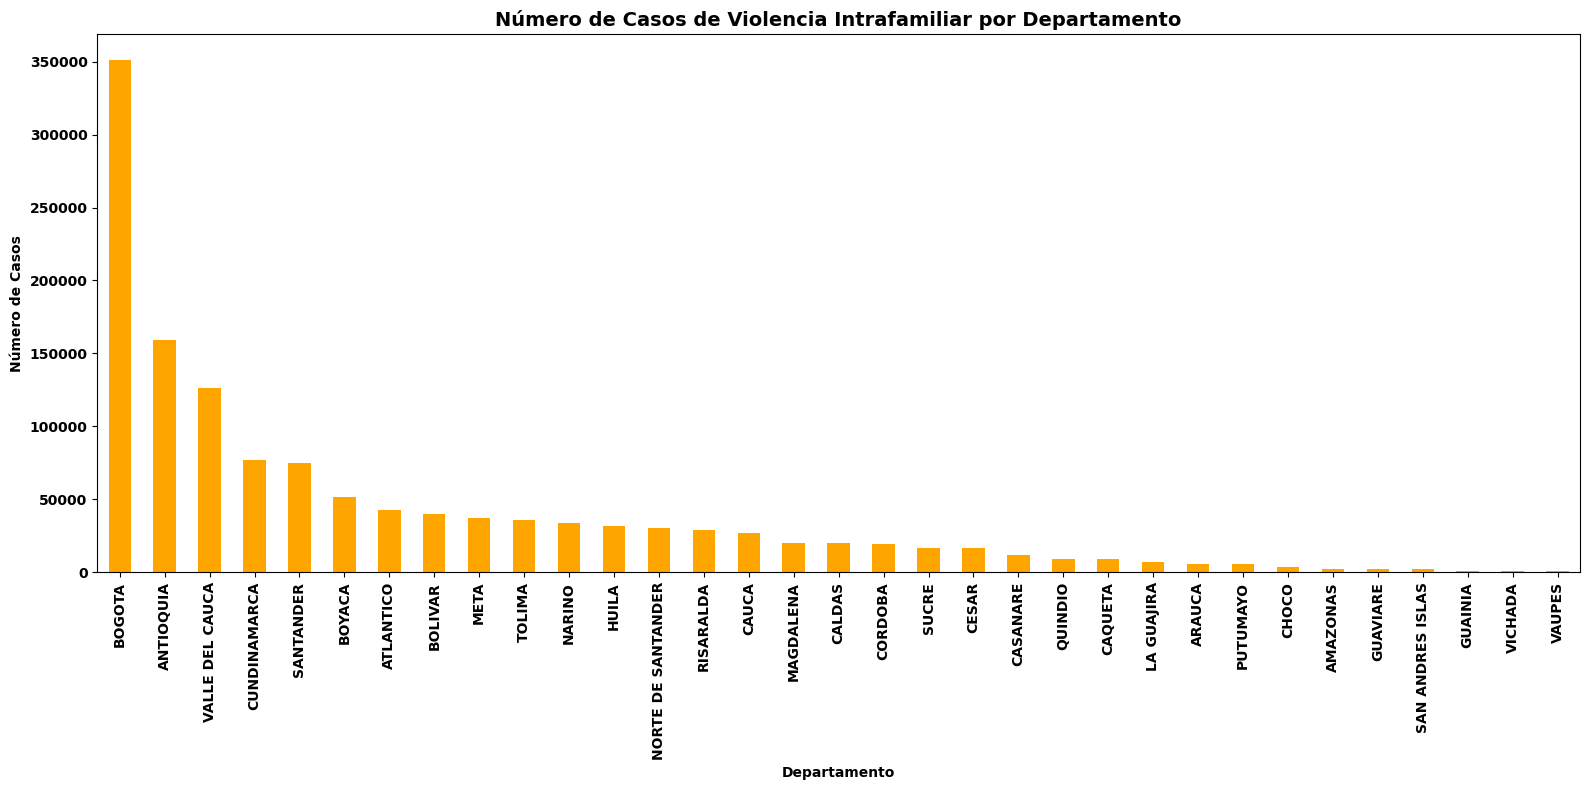

In [65]:
# Instrucción de la gráfica de cantidad de casos de violencia intrafamiliar ordenados por departamentos de mayor a menor
plt.figure(figsize=(16, 8))
casos_ordenados.plot(kind='bar', color='orange')
plt.title('Número de Casos de Violencia Intrafamiliar por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Con esta gráfica se puede apreciar que el departamento con la mayor cantidad de casos de violencia intrafamiliar es Bogotá con un total de: 351165
El departamento con menor canmtidad de registros de violencia intrafamiliar es Vaupes.
Los primeros 5 departaamentos con mayor cantidad de casos de violencia intrafamiliar son: BOGOTA, ANTIOQUIA, VALLE DEL CAUCA, CUNDINAMARCA, SANTANDER.

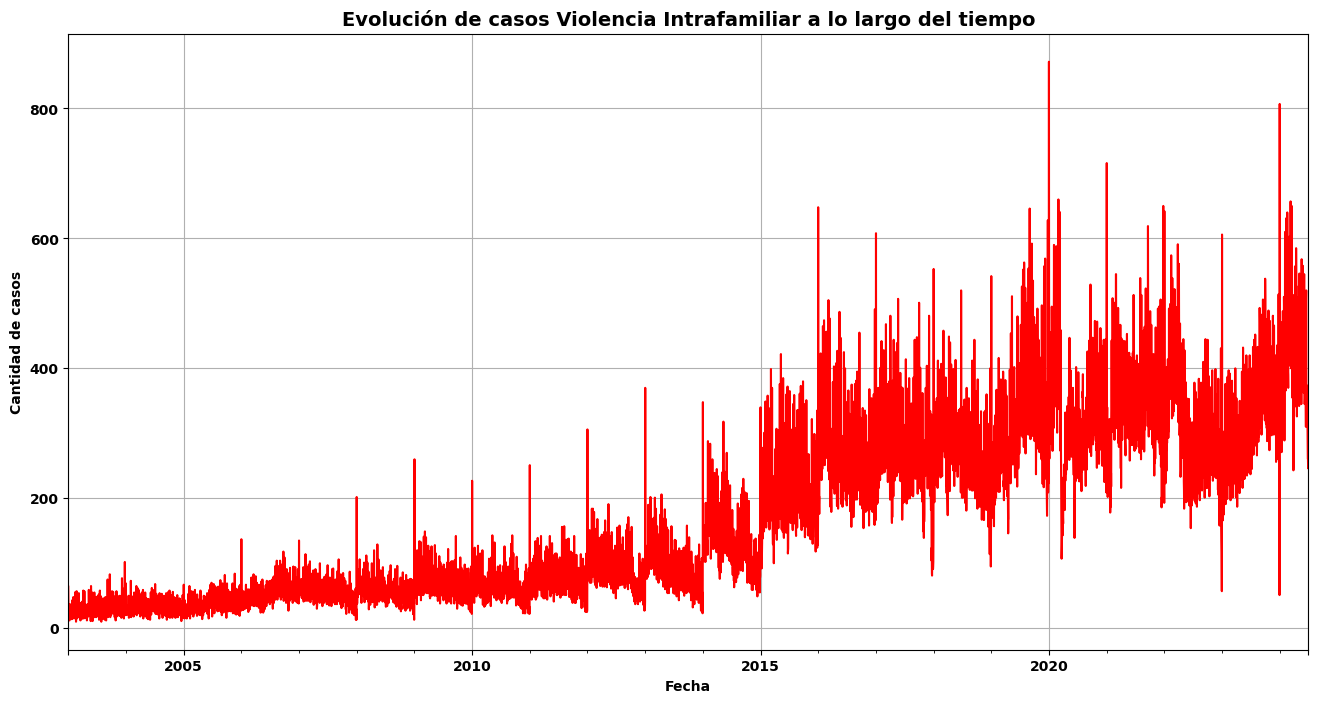

In [66]:
# Instrucción para agrupar los casos por fecha
cases_over_time = data_final.groupby('FECHA_CASO')['CANTIDAD'].sum()

# Instrucción para configurar la gráfica
plt.figure(figsize=(16, 8))
cases_over_time.plot(color='red')

# Instrucción para crear la gráfica
plt.title('Evolución de casos Violencia Intrafamiliar a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.grid(True)
plt.show()

Con esta gráfica se puede ver el comportamiento a traves de los años de los casos de violencia intrafamiliar en Colombia. Año tras año las cifras han ido en aumento.

In [67]:
# Instrucción para agrupar por MUNICIPIO y CANTIDAD de mayor a menor
municipios_casos = data_final.groupby('CIUDAD_MUNICIPIO')['CANTIDAD'].sum()

top_10_municipios = municipios_casos.sort_values(ascending=False).head(10)
print(top_10_municipios)

CIUDAD_MUNICIPIO
BOGOTA           351165
MEDELLIN          92232
CALI              76434
VILLAVICENCIO     26090
CARTAGENA         25495
BUCARAMANGA       25372
BARRANQUILLA      25306
PASTO             22106
SOACHA            22081
CUCUTA            20544
Name: CANTIDAD, dtype: int64


Con esta lista podemos ver los departamentos con los datos de violencia intrafamiliar odenados de mayor a menor.

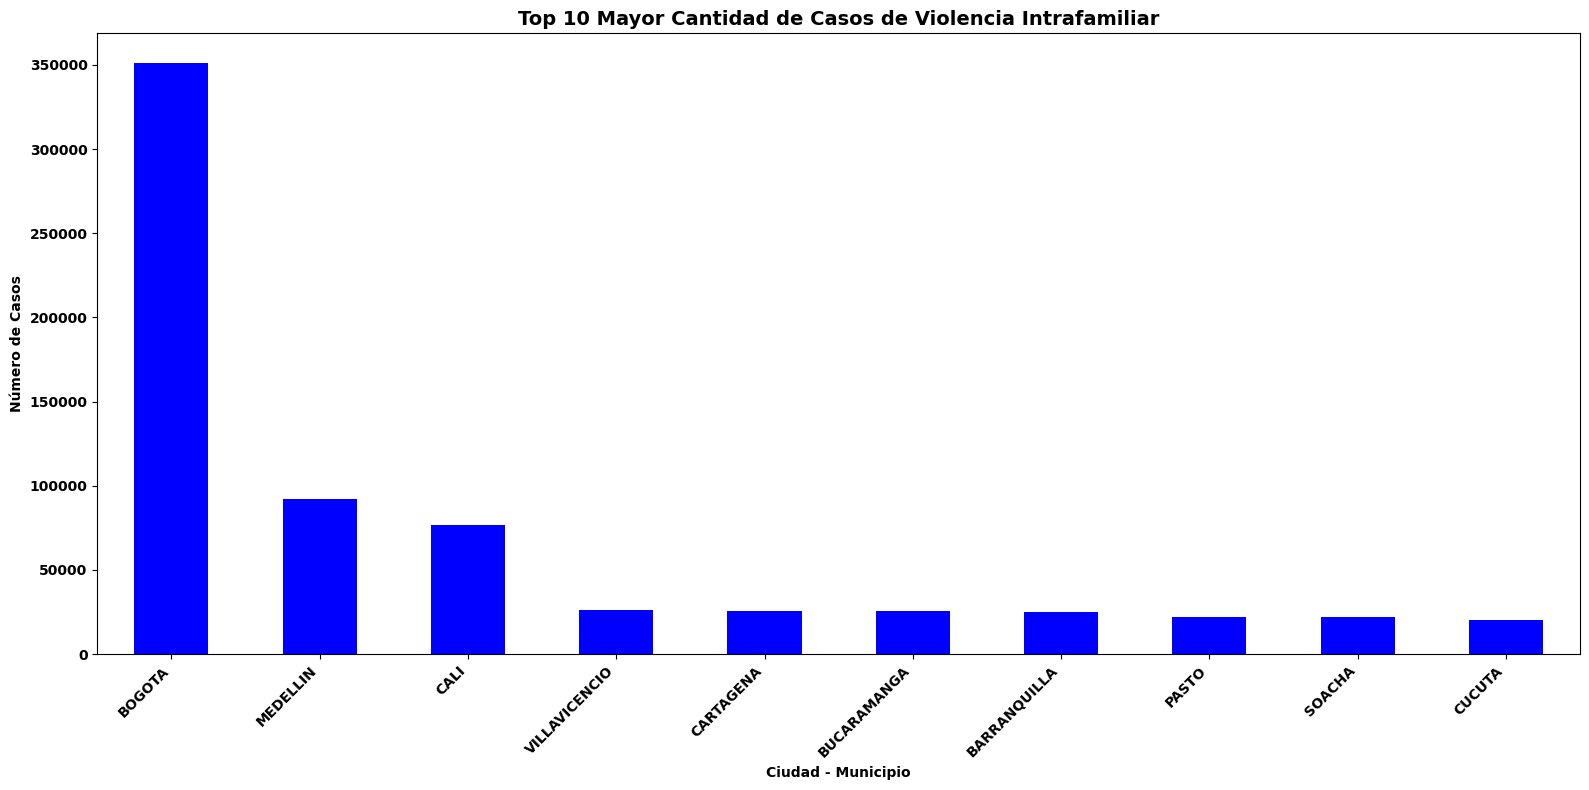

In [68]:
# Instrucción de la gráfica del top 10  de las CIUDADES_MUNICIPIOS con mayor cantidad de casos
plt.figure(figsize=(16, 8))
top_10_municipios.plot(kind='bar', color='blue')
plt.title('Top 10 Mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Ciudad - Municipio')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En esta gráfica aparece el top 10 de las ciudades - municipios con mayor indice de casos de violencia intrafamiliar en Colombia.

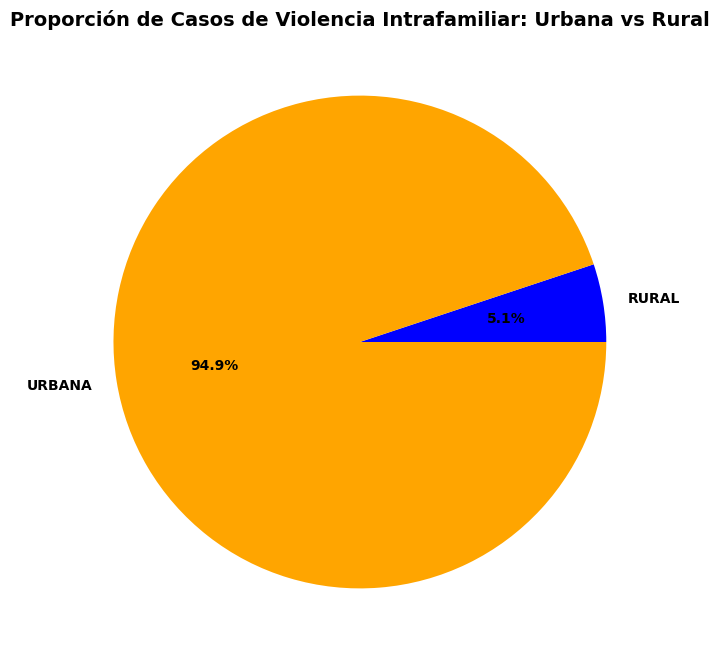

In [69]:
# Instrucción para agrupar por ZONA y CANTIDAD
casos_por_zona = data_final[data_final['ZONA'].isin(['URBANA', 'RURAL'])]  # Filtrar solo Urbana y Rural
casos_por_zona = casos_por_zona.groupby('ZONA')['CANTIDAD'].sum().reset_index()

# Instrucción para crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(casos_por_zona['CANTIDAD'],
        labels=casos_por_zona['ZONA'],
        autopct='%1.1f%%',
        colors=['blue', 'orange'])
plt.title('Proporción de Casos de Violencia Intrafamiliar: Urbana vs Rural')
plt.show()


En este gráfico de torta se puede evidenciar que la mayor cantidad de casos reportados de violencia intrafamiliar suceden en áreas urbanas.

In [70]:
# Instrucción para convertir nuevamente la columna FECHA_CASO, con este proceso separo y creo nuevas columnas de AÑO, MES, DÍA para trabajkar bien con las fechas
data_final['FECHA_CASO'] = pd.to_datetime(data_final['FECHA_CASO'], format='%d/%m/%Y', errors='coerce')

print(data_final['FECHA_CASO'].head())

data_final['AÑO'] = data_final['FECHA_CASO'].dt.year
data_final['MES'] = data_final['FECHA_CASO'].dt.month
data_final['DÍA'] = data_final['FECHA_CASO'].dt.day
print(data_final[['FECHA_CASO', 'AÑO', 'MES', 'DÍA']].head())

0   2024-06-30
1   2024-06-30
3   2024-06-30
4   2024-06-30
5   2024-06-30
Name: FECHA_CASO, dtype: datetime64[ns]
  FECHA_CASO   AÑO  MES  DÍA
0 2024-06-30  2024    6   30
1 2024-06-30  2024    6   30
3 2024-06-30  2024    6   30
4 2024-06-30  2024    6   30
5 2024-06-30  2024    6   30


In [99]:
# Instrucción para ver las primeras filas del Dataframe con las columnas que recien cree, AÑO, MES, DÍA
data_final.head()

,FECHA_CASO,CODIGO_DEPARTAMENTO,DEPARTAMENTO,CODIGO_MUNICIPIO,CIUDAD_MUNICIPIO,ZONA,CANTIDAD,AÑO,MES,DÍA
0,2024-06-30,5,ANTIOQUIA,5034,ANDES,URBANA,2,2024,6,30
1,2024-06-30,5,ANTIOQUIA,5045,APARTADO,URBANA,1,2024,6,30
3,2024-06-30,5,ANTIOQUIA,5088,BELLO,URBANA,3,2024,6,30
4,2024-06-30,5,ANTIOQUIA,5147,CAREPA,URBANA,1,2024,6,30
5,2024-06-30,5,ANTIOQUIA,5212,COPACABANA,URBANA,2,2024,6,30


      año  mes  CANTIDAD
11   2003   12       243
19   2004    8       242
25   2005    2       240
43   2006    8       156
53   2007    6       266
61   2008    2       277
74   2009    3       343
88   2010    5       371
102  2011    7       348
118  2012   11       381
122  2013    3       396
140  2014    9      1092
148  2015    5      1367
157  2016    2      2467
176  2017    9      3161
184  2018    5      3439
198  2019    7      3642
205  2020    2      3643
224  2021    9      3601
230  2022    3      4025
249  2023   10      4283
254  2024    3      5182


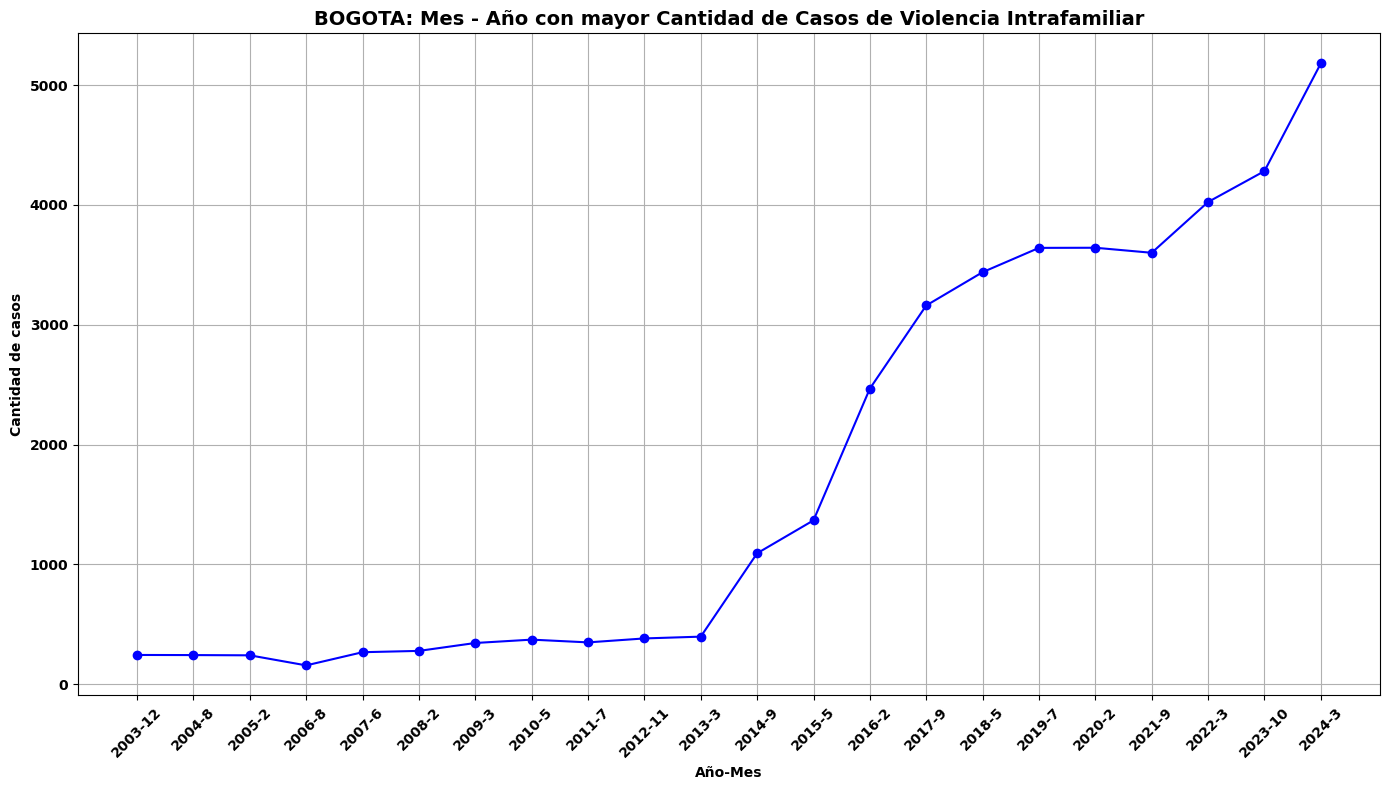

In [71]:
# Instrucción para filtrar por DEPARTAMENTO BOGOTA segun LA CANTIDAD de casos por año, además cree la gráfica
mes_data = data_final[data_final['DEPARTAMENTO'] == 'BOGOTA'].copy()
mes_data.loc[:, 'FECHA_CASO'] = pd.to_datetime(mes_data['FECHA_CASO'], format='%d/%m/%Y')
mes_data['año'] = mes_data['FECHA_CASO'].dt.year
mes_data['mes'] = mes_data['FECHA_CASO'].dt.month
mejor_mes_por_año = mes_data.groupby(['año', 'mes'])['CANTIDAD'].sum().reset_index()
mejor_mes_por_año = mejor_mes_por_año.loc[mejor_mes_por_año.groupby('año')['CANTIDAD'].idxmax()]
print(mejor_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_mes_por_año['año'].astype(str) + '-' + mejor_mes_por_año['mes'].astype(str),
         mejor_mes_por_año['CANTIDAD'], marker='o', linestyle='-', color='b')
plt.title('BOGOTA: Mes - Año con mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica permite ver la cantidad de casos de violencia intrafamiliar segun el mes en donde mayor casos se reportaron en Bogotá.

      año  mes  CANTIDAD
11   2003   12       370
14   2004    3       330
35   2005   12       322
38   2006    3       123
56   2007    9       107
66   2008    7       116
74   2009    3       109
84   2010    1        86
103  2011    8       101
108  2012    1       137
120  2013    1       159
134  2014    3       670
152  2015    9      1156
157  2016    2      1333
170  2017    3      1083
187  2018    8      1217
199  2019    8      1857
205  2020    2      1666
224  2021    9      1831
230  2022    3      1541
247  2023    8      1445
254  2024    3      1815


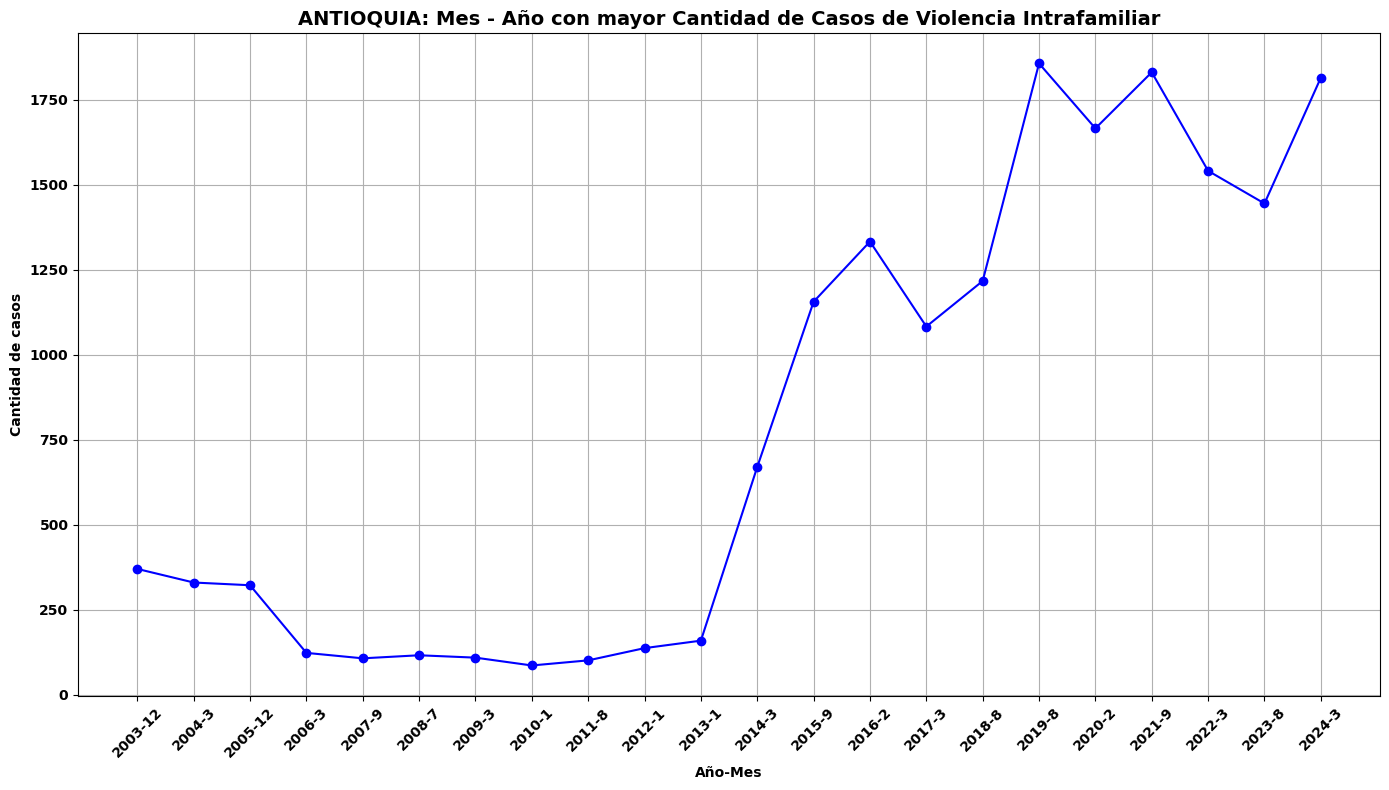

In [72]:
# Instrucción para filtrar por DEPARTAMENTO ANTIOQUIA segun LA CANTIDAD de casos por año, además cree la gráfica
mes_data = data_final[data_final['DEPARTAMENTO'] == 'ANTIOQUIA'].copy()
mes_data.loc[:, 'FECHA_CASO'] = pd.to_datetime(mes_data['FECHA_CASO'], format='%d/%m/%Y')
mes_data['año'] = mes_data['FECHA_CASO'].dt.year
mes_data['mes'] = mes_data['FECHA_CASO'].dt.month
mejor_mes_por_año = mes_data.groupby(['año', 'mes'])['CANTIDAD'].sum().reset_index()
mejor_mes_por_año = mejor_mes_por_año.loc[mejor_mes_por_año.groupby('año')['CANTIDAD'].idxmax()]
print(mejor_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_mes_por_año['año'].astype(str) + '-' + mejor_mes_por_año['mes'].astype(str),
         mejor_mes_por_año['CANTIDAD'], marker='o', linestyle='-', color='b')
plt.title('ANTIOQUIA: Mes - Año con mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica permite ver la cantidad de casos de violencia intrafamiliar segun el mes en donde mayor casos se reportaron en Antioquia.

      año  mes  CANTIDAD
3    2003    4        25
17   2004    6        50
30   2005    7       142
44   2006    9       677
48   2007    1       643
60   2008    1       590
74   2009    3       518
92   2010    9       577
103  2011    8       640
108  2012    1       687
120  2013    1       805
137  2014    6       688
148  2015    5       695
157  2016    2       716
172  2017    5       754
188  2018    9       691
200  2019    9      1062
205  2020    2       889
224  2021    9       951
230  2022    3       966
249  2023   10      1020
252  2024    1      1056


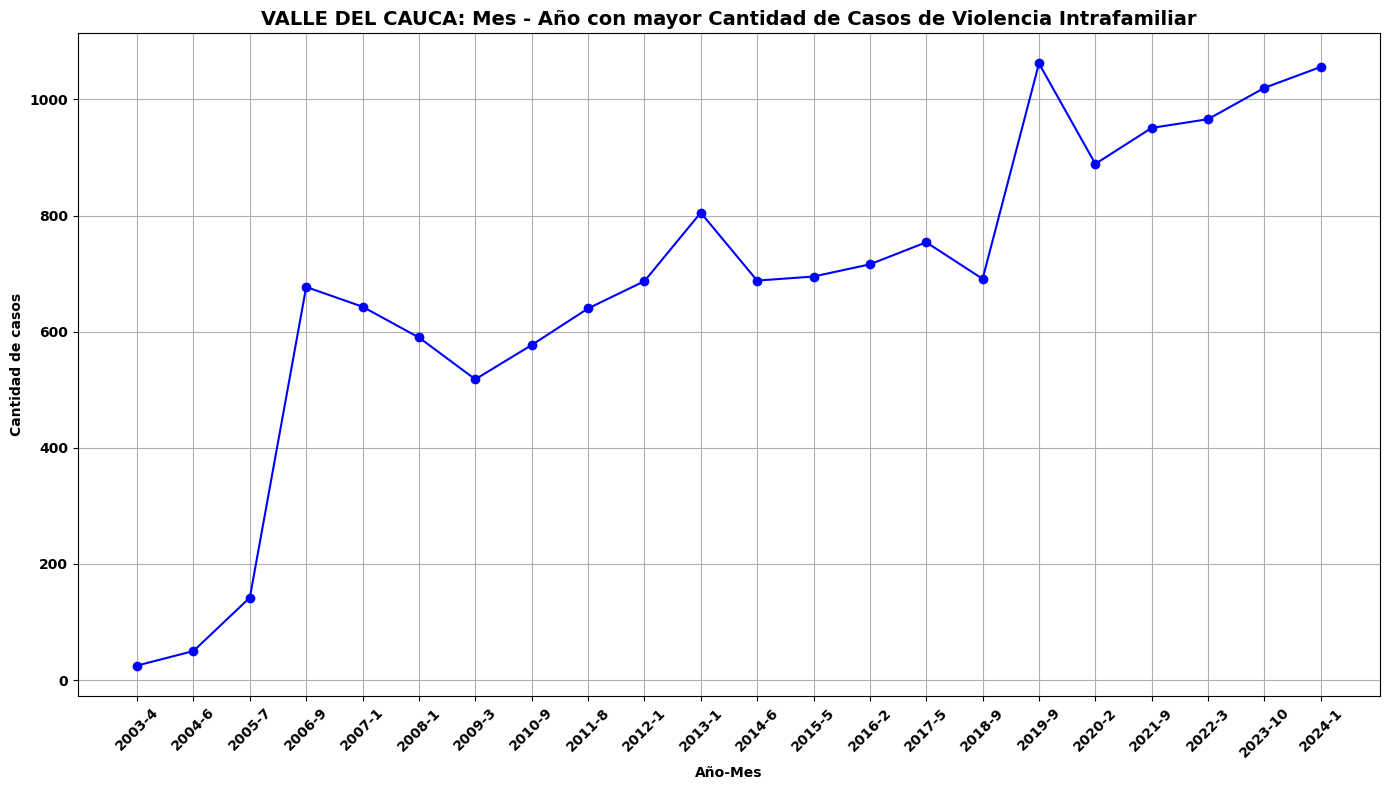

In [73]:
# Instrucción para filtrar por DEPARTAMENTO VALLE DEL CAUCA segun LA CANTIDAD de casos por año, además cree la gráfica
mes_data = data_final[data_final['DEPARTAMENTO'] == 'VALLE DEL CAUCA'].copy()
mes_data.loc[:, 'FECHA_CASO'] = pd.to_datetime(mes_data['FECHA_CASO'], format='%d/%m/%Y')
mes_data['año'] = mes_data['FECHA_CASO'].dt.year
mes_data['mes'] = mes_data['FECHA_CASO'].dt.month
mejor_mes_por_año = mes_data.groupby(['año', 'mes'])['CANTIDAD'].sum().reset_index()
mejor_mes_por_año = mejor_mes_por_año.loc[mejor_mes_por_año.groupby('año')['CANTIDAD'].idxmax()]
print(mejor_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_mes_por_año['año'].astype(str) + '-' + mejor_mes_por_año['mes'].astype(str),
         mejor_mes_por_año['CANTIDAD'], marker='o', linestyle='-', color='b')
plt.title('VALLE DEL CAUCA: Mes - Año con mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica permite ver la cantidad de casos de violencia intrafamiliar segun el mes en donde mayor casos se reportaron en el Valle del Cauca.

      año  mes  CANTIDAD
11   2003   12       115
12   2004    1       126
35   2005   12        96
36   2006    1       113
51   2007    4        79
65   2008    6       206
74   2009    3       100
84   2010    1        45
103  2011    8        28
114  2012    7        95
129  2013   10        66
134  2014    3       177
152  2015    9       382
157  2016    2       550
177  2017   10       595
182  2018    3       579
200  2019    9       772
205  2020    2       905
220  2021    5       927
230  2022    3      1171
249  2023   10       990
256  2024    5       987


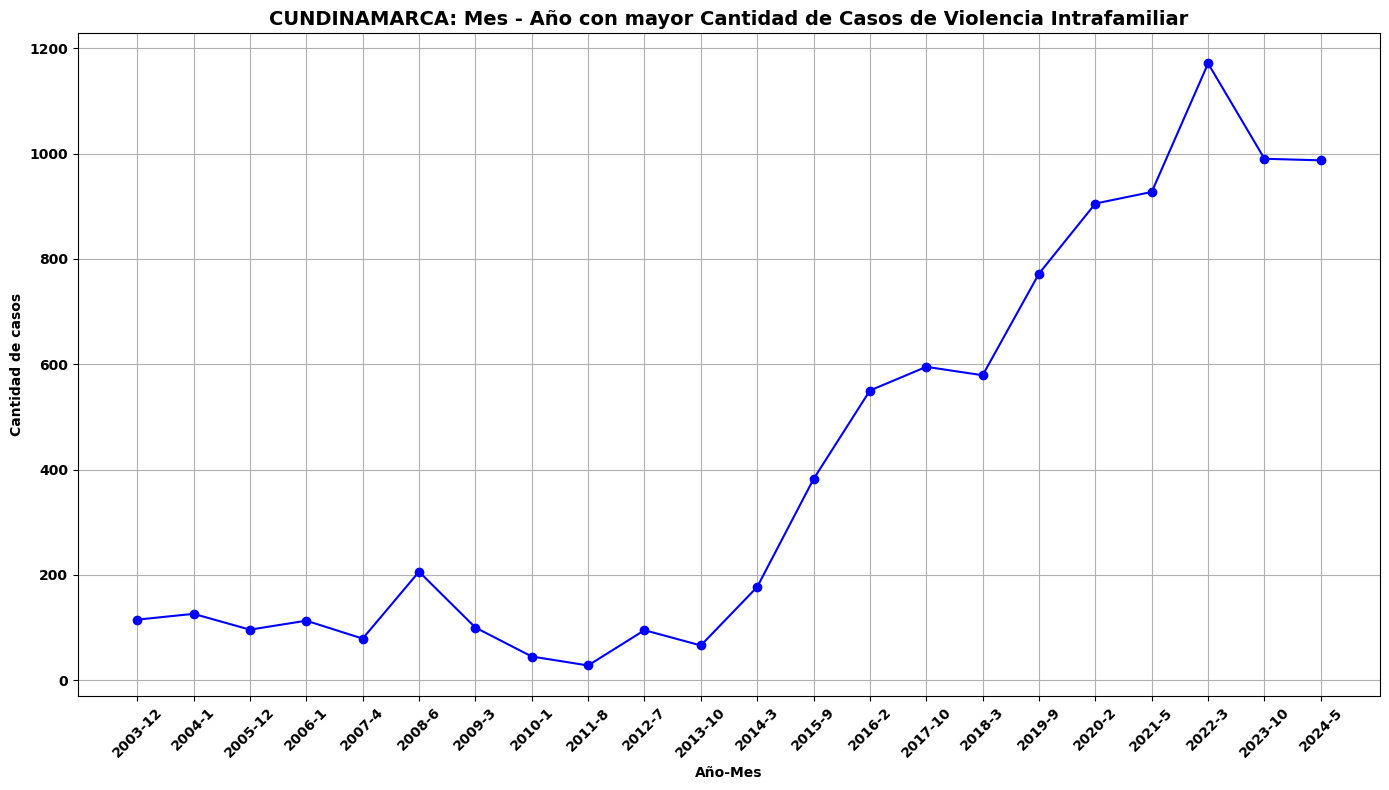

In [74]:
# Instrucción para filtrar por DEPARTAMENTO CUNDINAMARCA segun LA CANTIDAD de casos por año, además cree la gráfica
mes_data = data_final[data_final['DEPARTAMENTO'] == 'CUNDINAMARCA'].copy()
mes_data.loc[:, 'FECHA_CASO'] = pd.to_datetime(mes_data['FECHA_CASO'], format='%d/%m/%Y')
mes_data['año'] = mes_data['FECHA_CASO'].dt.year
mes_data['mes'] = mes_data['FECHA_CASO'].dt.month
mejor_mes_por_año = mes_data.groupby(['año', 'mes'])['CANTIDAD'].sum().reset_index()
mejor_mes_por_año = mejor_mes_por_año.loc[mejor_mes_por_año.groupby('año')['CANTIDAD'].idxmax()]
print(mejor_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_mes_por_año['año'].astype(str) + '-' + mejor_mes_por_año['mes'].astype(str),
         mejor_mes_por_año['CANTIDAD'], marker='o', linestyle='-', color='b')
plt.title('CUNDINAMARCA: Mes - Año con mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica permite ver la cantidad de casos de violencia intrafamiliar segun el mes en donde mayor casos se reportaron en Cundinamarca.

      año  mes  CANTIDAD
4    2003    5        86
21   2004   10        58
30   2005    7        68
44   2006    9       148
48   2007    1        98
61   2008    2        93
74   2009    3       236
93   2010   10       265
103  2011    8       363
108  2012    1       398
121  2013    2       377
139  2014    8       476
148  2015    5       579
156  2016    1       695
172  2017    5       521
181  2018    2       482
200  2019    9       523
212  2020    9       570
217  2021    2       602
230  2022    3       413
246  2023    7       442
256  2024    5       555


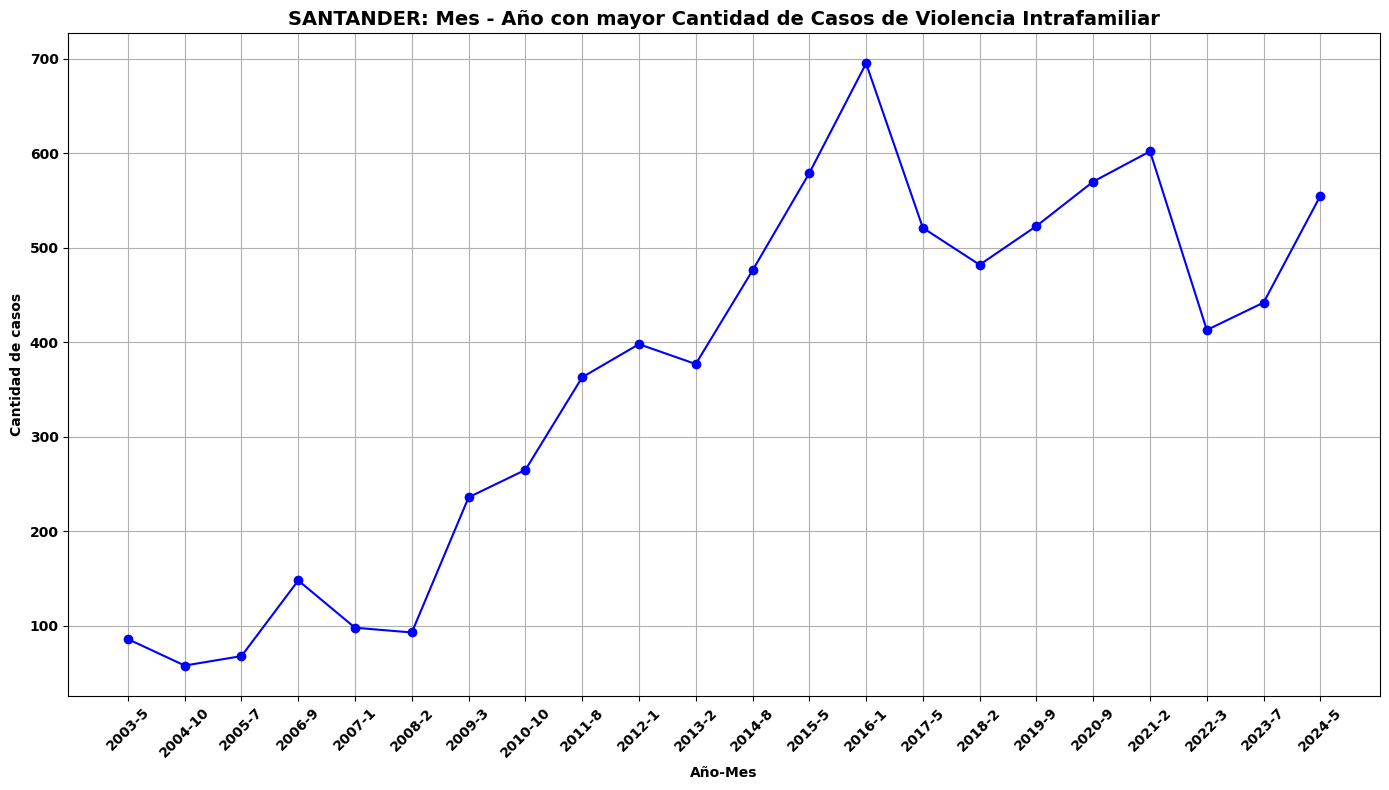

In [100]:
# Instrucción para filtrar por DEPARTAMENTO SANTANDER segun LA CANTIDAD de casos por año, además cree la gráfica
mes_data = data_final[data_final['DEPARTAMENTO'] == 'SANTANDER'].copy()
mes_data.loc[:, 'FECHA_CASO'] = pd.to_datetime(mes_data['FECHA_CASO'], format='%d/%m/%Y')
mes_data['año'] = mes_data['FECHA_CASO'].dt.year
mes_data['mes'] = mes_data['FECHA_CASO'].dt.month
masviolento_mes_por_año = mes_data.groupby(['año', 'mes'])['CANTIDAD'].sum().reset_index()
masviolento_mes_por_año = masviolento_mes_por_año.loc[masviolento_mes_por_año.groupby('año')['CANTIDAD'].idxmax()]
print(masviolento_mes_por_año)

plt.figure(figsize=(14, 8))
plt.plot(masviolento_mes_por_año['año'].astype(str) + '-' + masviolento_mes_por_año['mes'].astype(str),
         masviolento_mes_por_año['CANTIDAD'], marker='o', linestyle='-', color='b')
plt.title('SANTANDER: Mes - Año con mayor Cantidad de Casos de Violencia Intrafamiliar')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica permite ver la cantidad de casos de violencia intrafamiliar segun el mes en donde mayor casos se reportaron en Santander.

In [101]:
# Instrucción para agrupar los datos por DEPARTAMENTO y sumar la CANTIDAD de casos
departamento_agrupado = data_final.groupby('DEPARTAMENTO').sum(numeric_only=True).reset_index()

# Instrucción para seleccionar los 5 departamentos con más casos de violencia intrafamiliar
top_5_departamentos = departamento_agrupado.nlargest(5, 'CANTIDAD')
print(top_5_departamentos)


       DEPARTAMENTO  CODIGO_DEPARTAMENTO  CODIGO_MUNICIPIO  CANTIDAD  \
4            BOGOTA               161205         161219655    351165   
1         ANTIOQUIA               304915         322412508    159492   
30  VALLE DEL CAUCA              3922436        3938394029    126322   
14     CUNDINAMARCA              1219150        1243342055     77067   
27        SANTANDER              2849404        2861108517     74777   

          AÑO     MES     DÍA  
4    29518537   94537  229923  
1   123013773  382688  942796  
30  104024960  323875  796820  
14   98419633  301626  751422  
27   84484749  262090  646457  


In [102]:
# Instrucción para agrupar por DEPARTAMENTO y FECHA_CASO, sumando la CANTIDAD de casos
departamento_agrupado = data_final.groupby(['DEPARTAMENTO', 'FECHA_CASO']).sum(numeric_only=True).reset_index()

In [104]:
# Instrucción para sumar la CANTIDAD de casos por departamento, seleccionando el top 5 de DEPARTAMENTOS y así filtrando los datos
total_casos = departamento_agrupado.groupby('DEPARTAMENTO').sum(numeric_only=True).reset_index()

top_5_departamentos = total_casos.nlargest(5, 'CANTIDAD')['DEPARTAMENTO']

departamentos_top5 = departamento_agrupado[departamento_agrupado['DEPARTAMENTO'].isin(top_5_departamentos)]

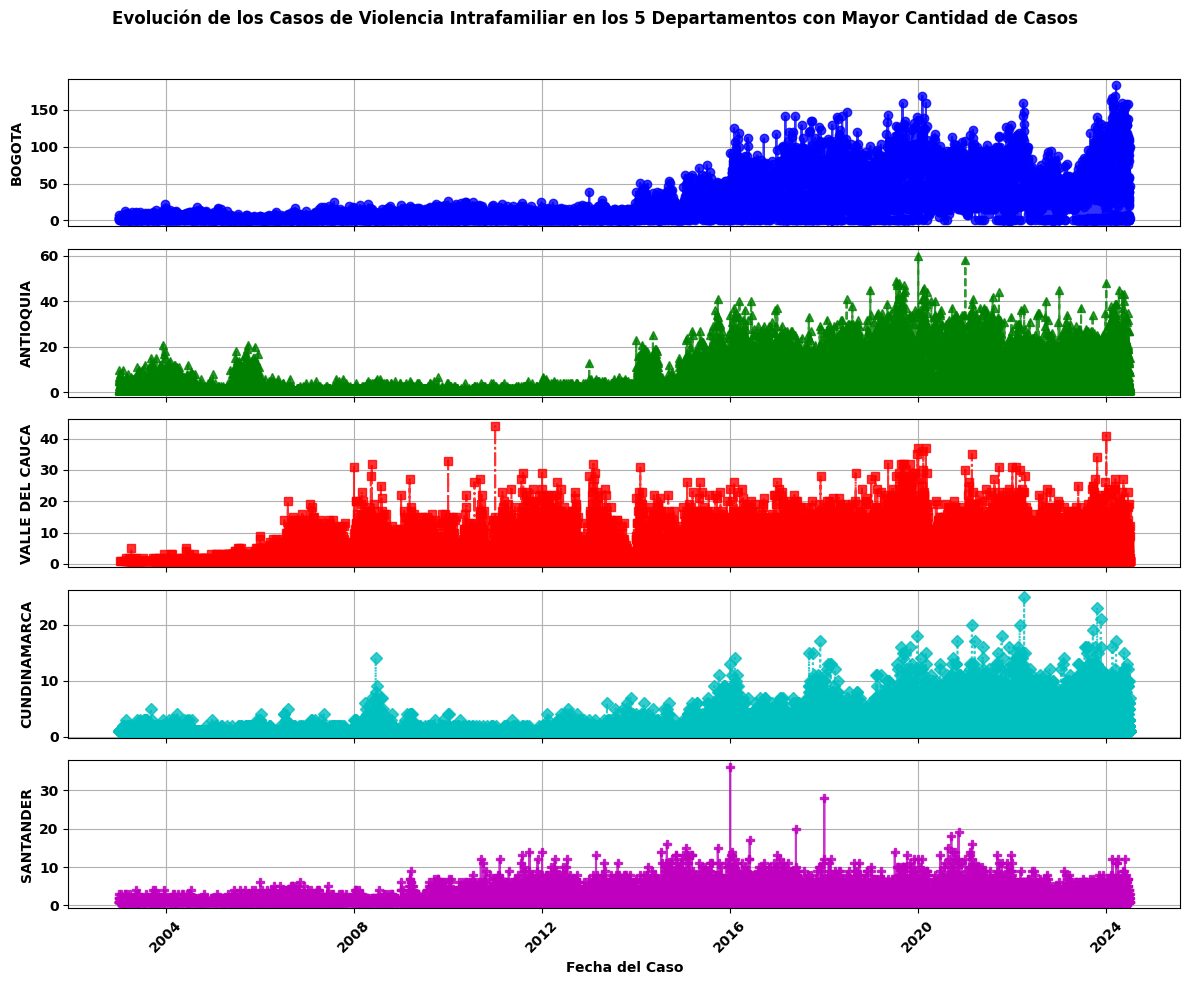

In [105]:
# Instrucción para crear el grafico del top 5 de DEPARTAMENTOS con mayor cantidad de casos por año
fig, axs = plt.subplots(len(top_5_departamentos), 1, figsize=(12, 10), sharex=True)

# Instrucción de lista de estilos de línea, marcadores y colores
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', '^', 's', 'D', 'P']
colors = ['b', 'g', 'r', 'c', 'm']

# Instrucción para crear la gráfica
for i, departamento in enumerate(top_5_departamentos):
    df_temp = data_final[data_final['DEPARTAMENTO'] == departamento]
    axs[i].plot(df_temp['FECHA_CASO'], df_temp['CANTIDAD'],
                linestyle=line_styles[i % len(line_styles)],
                marker=markers[i % len(markers)],
                color=colors[i % len(colors)],
                alpha=0.8)
    axs[i].set_ylabel(departamento)
    axs[i].grid(True)

plt.xlabel('Fecha del Caso')
plt.suptitle('Evolución de los Casos de Violencia Intrafamiliar en los 5 Departamentos con Mayor Cantidad de Casos', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el espacio para el título
plt.show()


En esta gráfica se puede ver el top 5 de los departamentos con mayores casos de violencia intrafamiliar, evidencia oómo al pasar de los años han ido aumentando las cifras.

# **Conclusiones Generales:**

Trabajé con un conjunto de datos tomado de: https://www.datos.gov.co/
Actualizado al 17 de Julio de 2024

**Integridad y Limpieza de los Datos:** El conjunto de datos inicial contiene errores en las columnas de Departamento y Municipio, los datos estan cruzados, en algunas filas se encuentran campos que ser resisten a una limpieza inicial por lo cual hay que hacer una limpieza profunda, no manejan el mismo formato de fecha en todas las filas todo esto fue corregido, también tiene filas duplicadas que fueron identificadas y eliminadas, lo cual es crucial para asegurar la calidad y precisión de cualquier análisis posterior. La estandarización ayuda a mantener la consistencia en los datos y facilita su uso en análisis y visualizaciones.

**Departamentos y municipios de Colombia con más casos de violencia intrafamiliar:** La mayor cantidad de casos de violencia intrafamiliar se registran en la ciudad de Bogotá, son cifras muy altas que año tras año han venido creciendo. Le siguen Antioquia, Valle del Cauca, Cundinamarca y Santander con numeros muy altos.

**Cantidad de casos de violencia intrafamiliar a lo largo del tiempo:** Las cifras de violencia intrafamiliar han ido en aumento, en las gráficas se puede apreciar el incremento.  

**Incidencia de casos entre zonas rurales y urbanas:** La cantidad de casos de violencia intrafamiliar se presentan en zonas urbanas, aqui hay que entrar a revisar si este numero tan bajo se debe a una paz absoluta con hogares llenos de valores o a que los miembros que sufren de este flagelo callan por razones diversas, bien sea culturales, porque no saben cómo ni donde se pueden hacer estas denuncias. Estos departamentos con zonas rurales podrían ser el foco de futuros estudios para entender las razones detrás de estos bajos indicadores.

**Picos de alta incidencia de violencia intrafamiliar:** Para el año 2020 vemos un crecimiento de los casos de violencia intrafamiliar, durante el tiempo de la pandemia se presentaron picos altos de casos debido a que todos los miembros del hogar estaban en casa encerrados.

**Validación Final:** La validación final permite asegurar que después de la limpieza y estandarización, no quedan errores ni desorden en el conjunto de datos, no hay duplicados, garantizando así la calidad de los datos para cualquier análisis adicional.

# **Implicaciones Prácticas:**

Planificación y Distribución de Recursos:

• Las cifras son muy altas, es evidente el crecimiento año tras año de los casos que se reportan en el país, sin contar con los casos que no son denunciados, es importante y urgente planificar la forma de ayudar a las victimas. Muchas personas que sufren maltrato intrafamiliar dependen económicamente de sus victimarios, necesitan sentir que no estan solas, ni solos.

Políticas Regionales:

• Es importante crear campañas constantemente para ayudar a que las personas victimas de maltrato intrafamiliar puedan denunciar y de igual modo crear las rutas, planes de lo que sigue después de la denuncia, un plan que pueda ayudar a las personas a salir adelante con acompañamiento psicológico y social.
•Se debe prestar atención a las zonas rurales ya que pueden existir casos sin reportar por razones diversas, sería bueno estudiar las zonas rurales de cada departamento

**Mejoras en la Calidad de Datos:**

• El proceso de limpieza y estandarización de datos destaca la importancia de mantener bases de datos limpias y estandarizadas para facilitar análisis precisos y útiles. Es increíble ver que un tema tan doloroso como lo es la violencia intrafamiliar se presenta con tanto desorden, para poder tomar las acciones necesarias se debe empezar desde lo mas minimo y es poniendo seriedad y atención a las cifras, de esa manera se van a poder crear campañas y apoyos a las personas que sufren día a día.